<a href="https://colab.research.google.com/github/humi6943/APRD6342-Python/blob/master/Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Topic Modeling Project
###Brand Name: Timberland

In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/APRD2/meta_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path,'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
sortedlist

[(3429257, 'Clothing, Shoes & Jewelry'),
 (1086181, 'Women'),
 (617092, 'Clothing'),
 (541681, 'Men'),
 (537761, 'Novelty, Costumes & More'),
 (432653, 'Shoes'),
 (339900, 'Novelty'),
 (268065, 'Shoes & Accessories: International Shipping Available'),
 (255454, 'Jewelry'),
 (174962, 'Accessories'),
 (97095, 'Girls'),
 (93596, 'Tops & Tees'),
 (87688, 'Dresses'),
 (84549, 'T-Shirts'),
 (82063, 'Boots'),
 (80302, 'Shirts'),
 (79897, 'Sandals'),
 (79545, 'Watches'),
 (77684, 'Boys'),
 (73507, 'Jewelry: International Shipping Available'),
 (72372, 'Athletic'),
 (71414, 'Wrist Watches'),
 (70335, 'Sports & Outdoors'),
 (59763, 'Petite'),
 (58350, 'Fashion'),
 (53826, 'Costumes & Accessories'),
 (53021, 'Earrings'),
 (51728, 'Baby'),
 (50943, 'Comfort Shoes'),
 (50662, 'Casual'),
 (50357, 'Boot Shop'),
 (50124, 'C'),
 (49599, 'Active'),
 (49491, 'Band & Music Fan'),
 (46004, 'New Arrivals'),
 (43722, 'Necklaces & Pendants'),
 (43410, 'Intimates'),
 (43100, 'S'),
 (41709, 'Lingerie, Sleep & L

In [0]:
from time import sleep
#create variable count to see how many product we have in the json
count = 0
#dictionarys
allproducts = {}
#each line of data here is a product and its metadata
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)

  aproduct = eval(aline)
    #print(aline)
    #sleep(30)

  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
allcategories = {}
count = 0
for aproduct in allproducts:
    # creating a counter to know our progress in processing the entire category
    count += 1
    if count % 100000 == 0:
        # we know there are 1.5 million products, dow we can build a counter that tells how our processing is going. 
        # When the counter reaches one, we'are done!
        print(count/1503384)
    # setting a didct up with just one product, so we can inspect and ref it
    aproduct = allproducts[aproduct]
    # creating a dictionary netry for each product category
    # also counting the occurance of each category
    if 'categories' in aproduct:
        for categories in aproduct['categories']:
            for acategory in categories:
                if acategory in allcategories:
                    allcategories[acategory] += 1
                if acategory not in allcategories:
                    allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
sortedlist = []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory],acategory))

sortedlist = sorted(sortedlist, reverse =True)

for item in range(0,50):
  print(sortedlist[item])

(3429257, 'Clothing, Shoes & Jewelry')
(1086181, 'Women')
(617092, 'Clothing')
(541681, 'Men')
(537761, 'Novelty, Costumes & More')
(432653, 'Shoes')
(339900, 'Novelty')
(268065, 'Shoes & Accessories: International Shipping Available')
(255454, 'Jewelry')
(174962, 'Accessories')
(97095, 'Girls')
(93596, 'Tops & Tees')
(87688, 'Dresses')
(84549, 'T-Shirts')
(82063, 'Boots')
(80302, 'Shirts')
(79897, 'Sandals')
(79545, 'Watches')
(77684, 'Boys')
(73507, 'Jewelry: International Shipping Available')
(72372, 'Athletic')
(71414, 'Wrist Watches')
(70335, 'Sports & Outdoors')
(59763, 'Petite')
(58350, 'Fashion')
(53826, 'Costumes & Accessories')
(53021, 'Earrings')
(51728, 'Baby')
(50943, 'Comfort Shoes')
(50662, 'Casual')
(50357, 'Boot Shop')
(50124, 'C')
(49599, 'Active')
(49491, 'Band & Music Fan')
(46004, 'New Arrivals')
(43722, 'Necklaces & Pendants')
(43410, 'Intimates')
(43100, 'S')
(41709, 'Lingerie, Sleep & Lounge')
(41542, 'Handbags & Wallets')
(41400, 'Rings')
(40832, "Women's Luxur

In [0]:
#We choose a set here because we don't want duplicates
alltimberlandasins = set()
count = 0

for areview in allproducts:
  thereview = allproducts[areview]
  count+=1
  if count % 100000 == 0:
    print(count/1503384)

  #let's iterate for each category for a product, again, any given product
  #can be assgined multiple product categories,
  for categories in thereview['categories']:
    #each category is actually encoded as a list (even though they should
    #just be strings, so we need to iterate one more time)
    for acategory in categories:
      #checking to see it the productcategory matches Timberland
      #lowercasing the category string  incase capitalization might get 
      #in the way of a match
      if 'timberland' in acategory.lower():
        #let's go ahead and store it to our set of Timberland ASINs
        alltimberlandasins.add(thereview['asin'])

print(len(alltimberlandasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
4686


#Save asins to .txt file

In [0]:
outputfile = open('drive/My Drive/Colab Notebooks/APRD2/allasins1.txt','w')

outputfile.write(','.join(alltimberlandasins))
outputfile.close()

In [0]:
##Review Data
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/APRD2/reviews_Clothing_Shoes_and_Jewelry1.json'
loadedjson = open(path,'r')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#Step 2 - Parsing the review data
#Let's load the review data into a dictionary. It's the exact same process
#as loading the review data
count=0
allreviews = {}
for aline in loadedjson:
   count += 1
   if count % 100000 == 0:
      print(count)
   areview = eval(aline)
#I'm arbitrarily using the iteration count as the key the dictionary 
#but you don't have to do this
   allreviews[count] = areview

#how many reviews do we have?
print(len(allreviews))

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5748920


In [0]:
from time import sleep
#Now, we need to go through all the reviews and pick the reviews that 
#correspond to the matching ASINs, that is reviews tied to Timberland ASINs

alltimberlandasins = []

for data in open('drive/My Drive/Colab Notebooks/APRD2/allasins1.txt','r'):
  asins = data.split(',')
  for anasin in asins:
    alltimberlandasins.append(anasin)
  
print(alltimberlandasins)


['B004RQ3GAE', 'B005FM6GY2', 'B00AZPOJ0C', 'B000XEXF0K', 'B001FY3WZA', 'B00B9PANZC', 'B001EWFF5S', 'B002NEGDCU', 'B003AZZLLU', 'B00GVDXN22', 'B000UCEHG6', 'B004ZCER0S', 'B002NEGP96', 'B00EALTP4M', 'B004KQ4HCM', 'B00AZPQW20', 'B003OBZR5A', 'B00BCJYT8M', 'B003A4Z0VM', 'B002WJHCVC', 'B0000C63H6', 'B001G8X0Y8', 'B001FY5S8O', 'B00295RJV2', 'B006F62ZVA', 'B0072NQJSA', 'B008IZ7JXA', 'B008M2ZZS0', 'B00AZPQX7E', 'B000XEVM50', 'B000XEI87U', 'B004EWG3M4', 'B008UTADGY', 'B0024N0XQ2', 'B004J8YE1A', 'B003NUR55C', 'B004H4WT04', 'B008M27BM8', 'B00FKL809M', 'B003UFJCP6', 'B0049N9UD2', 'B00AQLQ05W', 'B00B7FJXFK', 'B00B82ZHB6', 'B00BCJZF9E', 'B004P1G9S2', 'B003AZZM46', 'B000VWDBEE', 'B00B83WJMK', 'B008VQIUN4', 'B005MI8JLW', 'B003LVYYQQ', 'B008P34Q4A', 'B0034XRZEE', 'B00B9PJ11E', 'B005GY98C6', 'B000LIKI7G', 'B003ELP0UM', 'B001VNCKRQ', 'B003BLP4A6', 'B004RKJ8CU', 'B00828VOJ8', 'B008M27DUS', 'B00E41X5XA', 'B00AZPQ3W4', 'B000E9ZPJS', 'B000UCCQCI', 'B00213JS52', 'B003ELOYVS', 'B004CJLO0U', 'B0054HMASO', 'B00A

#Save Timberlandreviews to json file

In [0]:
timberlandreviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 100000 == 0:
    print(count/5748920)
    #setting current review as a dictionary, so we can easily reference its entring
  thereview = allreviews[areview]
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if thereview['asin'] in alltimberlandasins:
    #Im setting the ket here as something unique, if we just did byasin
    #we'd only have one review for each asin, with the last review the last review the only one being stored
    thekey = '%s.%s' % (theasin,reviewerid)
    timberlandreviews[thekey] = thereview

# that's it! all Gucci Reviews are stored timberlandreviews
#how nany Timberland reviews do we have?
print(len(timberlandreviews))

import json
#let's save our data as a JSON dictionary
json.dump(timberlandreviews,open('drive/My Drive/Colab Notebooks/APRD2/alltimberlandreviews.json','w'))

#another way to save dictionary
#alltimberlandreviews = json.load(open('drive/My Drive/Colab Notebooks/APRD2/alltimberlandreviews.json','r'))

0.017394571502125616
0.03478914300425123
0.05218371450637685
0.06957828600850247
0.08697285751062808
0.1043674290127537
0.12176200051487931
0.13915657201700493
0.15655114351913055
0.17394571502125616
0.19134028652338178
0.2087348580255074
0.226129429527633
0.24352400102975863
0.2609185725318843
0.27831314403400986
0.2957077155361355
0.3131022870382611
0.33049685854038674
0.34789143004251233
0.365286001544638
0.38268057304676356
0.4000751445488892
0.4174697160510148
0.43486428755314044
0.452258859055266
0.46965343055739167
0.48704800205951726
0.5044425735616429
0.5218371450637685
0.5392317165658941
0.5566262880680197
0.5740208595701454
0.591415431072271
0.6088100025743965
0.6262045740765222
0.6435991455786478
0.6609937170807735
0.678388288582899
0.6957828600850247
0.7131774315871503
0.730572003089276
0.7479665745914015
0.7653611460935271
0.7827557175956528
0.8001502890977784
0.8175448605999039
0.8349394321020296
0.8523340036041552
0.8697285751062809
0.8871231466084064
0.904517718110532


#Load Timberland file

In [0]:
#####Use timberland topic json file
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/APRD2/alltimberlandreviews.json'
timberlandreviews = json.load(open(path,'r'))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
timberlandreviews

{'B000073TM3.A1CX6C5BO9DRGN': {'asin': 'B000073TM3',
  'helpful': [0, 0],
  'overall': 5.0,
  'reviewText': "I'VE PURCHASED FIELD BOOTS ALOT OF TIMES FROM VARIOUS STORE AND I MUST ADMITT FOR THE PRICE THEY ARE GOOD IN COLOR WITH NO MARKS ON THEM AT ALL.MY SON LIKES THEM AS I DO AS WELL.THE DELIVERY WAS REALLY FAST THATS A PLUS",
  'reviewTime': '01 3, 2014',
  'reviewerID': 'A1CX6C5BO9DRGN',
  'reviewerName': 'ABDULMALIK I WINTERS',
  'summary': 'Satisfied',
  'unixReviewTime': 1388707200},
 'B000073TM3.A36UYIBGY41AZ1': {'asin': 'B000073TM3',
  'helpful': [0, 0],
  'overall': 4.0,
  'reviewText': "Excellent quality.  Great price.  I am an adult female size 8 and the big boy's size 6.5 fit perfect.  These boots will be terrific in the snow and look great with jeans.",
  'reviewTime': '02 3, 2014',
  'reviewerID': 'A36UYIBGY41AZ1',
  'reviewerName': 'Amazon Customer',
  'summary': 'Great for women too',
  'unixReviewTime': 1391385600},
 'B000073TM3.A5BTK3YH51YPE': {'asin': 'B000073TM3',


In [0]:
#extract all the review text
timberlandtext = []
for areview in timberlandreviews:
  areview = timberlandreviews[areview]
  if 'reviewText' in areview:
    timberlandtext.append(areview['reviewText'])
#and then we convert text to dic
timberlanddict = dict(zip(range(len(timberlandtext)), timberlandtext))


In [0]:
timberlanddict

{0: "I'VE PURCHASED FIELD BOOTS ALOT OF TIMES FROM VARIOUS STORE AND I MUST ADMITT FOR THE PRICE THEY ARE GOOD IN COLOR WITH NO MARKS ON THEM AT ALL.MY SON LIKES THEM AS I DO AS WELL.THE DELIVERY WAS REALLY FAST THATS A PLUS",
 1: "Excellent quality.  Great price.  I am an adult female size 8 and the big boy's size 6.5 fit perfect.  These boots will be terrific in the snow and look great with jeans.",
 2: "I have work TIms and Outside work Tims. But always Tims. They're comfortable, last long, and I've been rebuying Timberlands for the past 6 years. Only boot I trust.",
 3: 'I really like this boot it looks great. The color I like the most. The soft brown earth tone color is awesome.',
 4: 'I love Timberland boots and these are no exception. And these are original Tims..no knockoffs. Nice fit and good quality.',
 5: 'I love these boots they are perfect for my six year old. They are durable and I love the darker color so the dirt does not show as much. The price was great and shipping w

#Processing

In [0]:
!pip install tmtoolkit

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

     |████████████████████████████████| 19.9MB 201kB/s 
     |████████████████████████████████| 2.3MB 43.5MB/s 
     |████████████████████████████████| 1.5MB 51.6MB/s 
     |████████████████████████████████| 112kB 48.8MB/s 
     |████████████████████████████████| 22.1MB 177kB/s 
     |████████████████████████████████| 3.0MB 50.9MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449903 sha256=d89b2bcee50cb1ed1d9895cf4537f0e08296a9f2f3acd0f198f24b9d7586c09c
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
  Created wheel for globre: filename=globre-0.1.5-cp36-none-any.whl size=19528 sha256=cfa25799b7d532cf07c40191358878009e64aef8960cf5d6ffbb7f674e77ed20
  Stored in directory: /root/.cache/pip/wheels/c4/3f/7f/be546f6d880521a8a7a1fe84cbe135fa859be63084682d3292
Successfully built nltk globre
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
  Foun

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import random
random.seed(20191120) # to make the sampling reproductble

import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus
import codecs
import csv
import urllib

In [0]:
#put dict to corpus
corpus = Corpus()
for key in timberlanddict:
  corpus.add_doc(str(key),timberlanddict[key])

In [0]:
print(len(corpus))
corpus.doc_labels
corpus['100']

28326


'Daughter loves these shoes. she has a wide foot and has trouble finding shoes that fit well and these are perfect. She has worn them straight away and no complaints about sore feet. You have to love that! Love timberland shoes and these are great quality.'

(array([2.4003e+04, 3.3690e+03, 6.6000e+02, 1.5900e+02, 9.3000e+01,
        2.2000e+01, 1.1000e+01, 4.0000e+00, 4.0000e+00, 1.0000e+00]),
 array([   0. ,  491.7,  983.4, 1475.1, 1966.8, 2458.5, 2950.2, 3441.9,
        3933.6, 4425.3, 4917. ]),
 <a list of 10 Patch objects>)

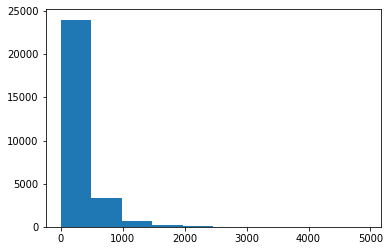

In [0]:
import matplotlib

matplotlib.pyplot.hist(corpus.doc_lengths.values())

In [0]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()# tage each word from the sentence
preproc.lemmatize()#extract original words
preproc.tokens_to_lowercase()
preproc.remove_special_chars_in_tokens()#remove special character
preproc.add_stopwords(['http','nt'])#remove http and nt

<TMPreproc [28326 documents]>

In [0]:
corpus['100']

'Daughter loves these shoes. she has a wide foot and has trouble finding shoes that fit well and these are perfect. She has worn them straight away and no complaints about sore feet. You have to love that! Love timberland shoes and these are great quality.'

In [0]:
preproc.vocabulary_size

28158

In [0]:
preproc.tokens['100']#check for after processing 

['daughter',
 'love',
 'these',
 'shoe',
 '',
 'she',
 'have',
 'a',
 'wide',
 'foot',
 'and',
 'have',
 'trouble',
 'find',
 'shoe',
 'that',
 'fit',
 'well',
 'and',
 'these',
 'be',
 'perfect',
 '',
 'she',
 'have',
 'wear',
 'them',
 'straight',
 'away',
 'and',
 'no',
 'complaint',
 'about',
 'sore',
 'foot',
 '',
 'you',
 'have',
 'to',
 'love',
 'that',
 '',
 'love',
 'timberland',
 'shoe',
 'and',
 'these',
 'be',
 'great',
 'quality',
 '']

In [0]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N')# built filer only looking at Noun
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=1)#remove commen words
#preproc_smaller.remove_uncommon_tokens(df_threshold=0.005)

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

28158
16879


In [0]:
#compare each cleansing, smaller is better. So we used smaller for the following analysis
print(preproc.tokens['100'])
print(preproc_smaller.tokens['100'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['2000'])
print(preproc_smaller.tokens['2000'])

['daughter', 'love', 'these', 'shoe', '', 'she', 'have', 'a', 'wide', 'foot', 'and', 'have', 'trouble', 'find', 'shoe', 'that', 'fit', 'well', 'and', 'these', 'be', 'perfect', '', 'she', 'have', 'wear', 'them', 'straight', 'away', 'and', 'no', 'complaint', 'about', 'sore', 'foot', '', 'you', 'have', 'to', 'love', 'that', '', 'love', 'timberland', 'shoe', 'and', 'these', 'be', 'great', 'quality', '']
['daughter', 'shoe', 'foot', 'trouble', 'shoe', 'perfect', 'complaint', 'sore', 'foot', 'love', 'timberland', 'shoe', 'quality']
['excellent', 'quality', '', 'great', 'price', '', 'i', 'be', 'an', 'adult', 'female', 'size', '8', 'and', 'the', 'big', 'boy', 's', 'size', '65', 'fit', 'perfect', '', 'these', 'boot', 'will', 'be', 'terrific', 'in', 'the', 'snow', 'and', 'look', 'great', 'with', 'jean', '']
['quality', 'great', 'price', 'adult', 'size', 'boy', 'size', 'fit', 'perfect', 'boot', 'snow', 'jean']
['i', 'just', 'buy', 'a', 'new', 'pair', 'of', 'these', '', 'to', 'replace', 'the', 'ol

In [0]:
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '10000', '10001', '10002', '10003',
       '10004'], dtype='<U5')

In [0]:
#extract all the vocab from corpus
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [0]:
#convert preproc to dtm 
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm
dtm_bg, dtm_sm

(<28326x28158 sparse matrix of type '<class 'numpy.int32'>'
 	with 1190391 stored elements in Compressed Sparse Row format>,
 <28326x16879 sparse matrix of type '<class 'numpy.int32'>'
 	with 282713 stored elements in Compressed Sparse Row format>)

#Creating model

In [0]:
!pip install tmtoolkit['lda']
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel



# path = 'drive/My Drive/

logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

#set data to use
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}
# and fixed hyperparameters
lda_params = {
    'n_topics': 20,
    'eta': .01,
    'n_iter': 1000,
    'random_state':20191122 # to make results reproducible
}

models = compute_models_parallel(dtms, constant_parameters=lda_params)

     |████████████████████████████████| 358kB 3.5MB/s 
     |████████████████████████████████| 102kB 12.4MB/s 


In [0]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1]
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm,top_n=5)

topic_1
> #1. day (0.119703)
> #2. foot (0.108612)
> #3. boot (0.098341)
> #4. hour (0.048515)
> #5. work (0.039555)
topic_2
> #1. boot (0.150240)
> #2. winter (0.062609)
> #3. snow (0.058421)
> #4. foot (0.054233)
> #5. weather (0.033294)
topic_3
> #1. boot (0.105561)
> #2. water (0.031137)
> #3. pair (0.023796)
> #4. foot (0.021821)
> #5. day (0.021720)
topic_4
> #1. shoe (0.134596)
> #2. foot (0.088814)
> #3. heel (0.035526)
> #4. support (0.034175)
> #5. insole (0.026519)
topic_5
> #1. shoe (0.363936)
> #2. pair (0.062954)
> #3. timberland (0.050288)
> #4. year (0.022617)
> #5. brand (0.017668)
topic_6
> #1. boot (0.059983)
> #2. lace (0.040751)
> #3. leather (0.038184)
> #4. month (0.028848)
> #5. sole (0.027915)
topic_7
> #1. size (0.289364)
> #2. shoe (0.115031)
> #3. order (0.041180)
> #4. boot (0.032734)
> #5. half (0.027741)
topic_8
> #1. boot (0.176328)
> #2. calf (0.056967)
> #3. size (0.041799)
> #4. leather (0.032319)
> #5. foot (0.027363)
topic_9
> #1. boot (0.121329)
> 

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_topic_words
import pandas as pd

In [0]:
df = pd.DataFrame(ldamodel_top_topic_words(model_sm.topic_word_, vocab_sm, top_n=5))
df.head()

,rank_1,rank_2,rank_3,rank_4,rank_5
topic,,,,,
topic_1,day (0.1197),foot (0.1086),boot (0.09834),hour (0.04852),work (0.03956)
topic_2,boot (0.1502),winter (0.06261),snow (0.05842),foot (0.05423),weather (0.03329)
topic_3,boot (0.1056),water (0.03114),pair (0.0238),foot (0.02182),day (0.02172)
topic_4,shoe (0.1346),foot (0.08881),heel (0.03553),support (0.03417),insole (0.02652)
topic_5,shoe (0.3639),pair (0.06295),timberland (0.05029),year (0.02262),brand (0.01767)


In [0]:
import re

In [0]:
poptopics = ''
for i in range(len(df)):
  topics = list(df.iloc[i,:])
  nb = str(i)+": "+" ".join([re.sub(r'\s\(.*?\)','',j) for j in topics])
  poptopics += nb + '\n'

print(poptopics)

0: day foot boot hour work
1: boot winter snow foot weather
2: boot water pair foot day
3: shoe foot heel support insole
4: shoe pair timberland year brand
5: boot lace leather month sole
6: size shoe order boot half
7: boot calf size leather foot
8: boot jean size look fit
9: sock size boot foot bit
10: shoe sandal son year foot
11: boot toe steel work timberland
12: amazon boot size shoe price
13: boot work pair day year
14: boot timberland quality price product
15: wallet card son money leather
16: color shoe size picture brown
17: pair boot year timberland time
18: bag quality time product trip
19: husband gift fit christmas great



#Topic Names and Classification

In [0]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words

In [0]:
print(model_sm)
doc_topic = model_sm.doc_topic_
doc_labels = np.array(preproc_smaller.doc_labels)
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)

print(len(doc_topic))
print(len(doc_lengths_sm))

#remove 'uncommon words' preprocessing
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_=.1
)

documentclassifications = ldamodel_top_doc_topics(doc_topic,doc_labels, top_n=2, topic_labels=topic_labels)
for index, arow in documentclassifications.iterrows():
  documentclassifications.set_value(index,'text',corpus[index])

28326
28326


In [0]:
#check the result
print('Results:')
lookup = documentclassifications[documentclassifications['text'].str.contains('boots')]
#print the list that two items
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]])

Results:
["Excellent quality.  Great price.  I am an adult female size 8 and the big boy's size 6.5 fit perfect.  These boots will be terrific in the snow and look great with jeans.", '9_khaki (0.5786)']


In [0]:
#save document to excel 
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
documentclassifications.to_excel('drive/My Drive/Colab Notebooks/APRD2/timberlandtopics.documentclassifications.xlsx')

Mounted at /content/drive


#Segment data by sales

In [0]:
import pickle
import json

from google.colab import drive
drive.mount('/content/drive')

path = 'drive/My Drive/Colab Notebooks/APRD2/meta_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path,'r')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from time import sleep
#create variable count to see how many product we have in the json
count = 0
#dictionarys
allproducts = {}
#each line of data here is a product and its metadata
for aline in loadedjson:
  count += 1
  if count % 100000 == 0:
    print(count)

  aproduct = eval(aline)
    #print(aline)
    #sleep(30)

  allproducts[aproduct['asin']] = aproduct

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [0]:
allcategories = {}
count = 0

for aproduct in allproducts:
  count += 1
  if count % 100000 == 0:
    print(count/1503384)
  aproduct = allproducts[aproduct]
  if 'categories' in aproduct:
    for categories in aproduct['categories']:
      for acategory in categories:
        if acategory in allcategories:
          allcategories[acategory] += 1
        if acategory not in allcategories:
          allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [0]:
sortedlist = []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory],acategory))

sortedlist = sorted(sortedlist, reverse =True)

for item in range(0,50):
  print(sortedlist[item])

(3429257, 'Clothing, Shoes & Jewelry')
(1086181, 'Women')
(617092, 'Clothing')
(541681, 'Men')
(537761, 'Novelty, Costumes & More')
(432653, 'Shoes')
(339900, 'Novelty')
(268065, 'Shoes & Accessories: International Shipping Available')
(255454, 'Jewelry')
(174962, 'Accessories')
(97095, 'Girls')
(93596, 'Tops & Tees')
(87688, 'Dresses')
(84549, 'T-Shirts')
(82063, 'Boots')
(80302, 'Shirts')
(79897, 'Sandals')
(79545, 'Watches')
(77684, 'Boys')
(73507, 'Jewelry: International Shipping Available')
(72372, 'Athletic')
(71414, 'Wrist Watches')
(70335, 'Sports & Outdoors')
(59763, 'Petite')
(58350, 'Fashion')
(53826, 'Costumes & Accessories')
(53021, 'Earrings')
(51728, 'Baby')
(50943, 'Comfort Shoes')
(50662, 'Casual')
(50357, 'Boot Shop')
(50124, 'C')
(49599, 'Active')
(49491, 'Band & Music Fan')
(46004, 'New Arrivals')
(43722, 'Necklaces & Pendants')
(43410, 'Intimates')
(43100, 'S')
(41709, 'Lingerie, Sleep & Lounge')
(41542, 'Handbags & Wallets')
(41400, 'Rings')
(40832, "Women's Luxur

In [0]:
alltimberlandasins = {}
count = 0
for areview in allproducts:
  count+=1
  if count % 100000 == 0:
    print(count/1503384)

  theproduct = allproducts[areview]
  if 'salesRank' in theproduct:
    for categories in theproduct['categories']:
      for acategory in categories:
        # print(acategory)
        if 'timberland' in acategory.lower():
          for acategory in theproduct['salesRank']:
            alltimberlandasins[areview] = theproduct['salesRank'][acategory]

print(len(alltimberlandasins))

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518
4556


In [0]:
unsortedsalesrank =[]
for aproduct in alltimberlandasins:
  unsortedsalesrank.append((alltimberlandasins[aproduct], aproduct))

In [0]:
#first thing is sales rank and second is asin
unsortedsalesrank[0]

(6603, 'B000073TM3')

In [0]:
sortedsalesrank = sorted(unsortedsalesrank)

In [0]:
sortedsalesrank[0:10]

[(74, 'B005BWB2QI'),
 (74, 'B005BWB2SG'),
 (74, 'B005BWB2WW'),
 (74, 'B005BWB2ZO'),
 (74, 'B005BWB3C6'),
 (74, 'B005BWB3P8'),
 (74, 'B005BWB3TY'),
 (74, 'B005BWB3VM'),
 (74, 'B005BWB3XA'),
 (74, 'B005BWB40M')]

In [0]:
top100products = sortedsalesrank[0:100]

In [0]:
salesrank = []
for aproduct in sortedsalesrank:
  salesrank.append(aproduct[0])

In [0]:
print(salesrank[0:10])

[74, 74, 74, 74, 74, 74, 74, 74, 74, 74]


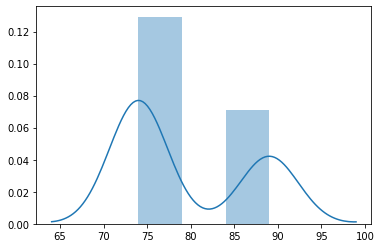

In [0]:
import numpy as mp
import seaborn as sns

ax = sns.distplot(salesrank[0:65])

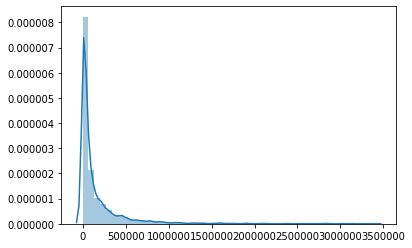

In [0]:
ax1 = sns.distplot(salesrank)